### Exploring Toronto Neighbourhoods

#### Introduction

This is the final capstone project of the Coursera course " IBM Professional Data Science Certificate". The project will attempt to analyse neighborhoods within the Greater Toronto Area (GTA) to find out what makes them similar or different in terms of the services they offer to residents, popularity, causes of complaints, etc. The objective is to help guide residents planning to move from one neighborhood to another for job or other personal reasons.

In [1]:
import pandas as pd

#### Scraping wikipedia for Toronto neighborhoods using pandas

In [2]:
df_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
toronto_data = df_tables[0]
toronto_data.head(10)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


#### Assigning Borough name to Neighborhoods with 'Not Assigned'

In [3]:
# picking out the Borough of interest

toronto_data[(toronto_data['Borough'] != 'Not assigned') & (toronto_data['Neighbourhood'] == 'Not assigned')]

,Postcode,Borough,Neighbourhood
8,M7A,Queen's Park,Not assigned


In [4]:
# using index 8 to make borough name to neighbourhood

toronto_data.loc[8].Neighbourhood = toronto_data.loc[8].Borough
toronto_data.head(10)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
9,M8A,Not assigned,Not assigned


#### Removing rows that have 'Not Assigned' under both Borough and Neighborhood columns

In [5]:
toronto_data = toronto_data[toronto_data['Borough'] != 'Not assigned']
toronto_data.reset_index().drop(['index'], axis=1).head(10)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


#### Joining neighborhoods that have the same postcode

In [6]:
toronto_grouped = toronto_data.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(','.join).reset_index()
toronto_grouped.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


#### Checking the shape of the dataframe

In [7]:
toronto_grouped.shape

(103, 3)

#### Importing geo-coordinates of Toronto Neighborhoods

In [8]:
tdot_geo = pd.read_csv('../dataBank/tdot_latlng.csv')
tdot_geo.columns = columns=['Postcode', 'Latitude', 'Longitude']
tdot_geo.head(10)

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [9]:
tdot_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Postcode     103 non-null object
Latitude     103 non-null float64
Longitude    103 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


#### Merging the two dataframes 

In [10]:
df_toronto = pd.merge(toronto_grouped, tdot_geo, on='Postcode')
df_toronto.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


#### Plotting map of Toronto

In [11]:
from geopy.geocoders import Nominatim
import folium 

# get central lat and long of Toronto
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [12]:
# create the map
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [13]:
import dotenv
import os
import json
import requests

In [14]:
# define Foursquare credentials
dotenv.load_dotenv()

CLIENT_ID = os.getenv("FOURSQUARE_ID") 
CLIENT_SECRET = os.getenv("FOURSQUARE_SECRET") 
VERSION = '20180605' # Foursquare API version

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
toronto_venues = getNearbyVenues(names=df_toronto['Postcode'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

In [17]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Postcode'] = toronto_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Postcode,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M1E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

toronto_grouped = toronto_onehot.groupby('Postcode').mean().reset_index()
toronto_grouped.head(20)

,Postcode,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,M1C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,M1E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,M1G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,M1H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
5,M1J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
6,M1K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
7,M1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
8,M1M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
9,M1N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [19]:
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


#  let's create the new dataframe and display the top 10 venues for each postcode.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postcode'] = toronto_grouped['Postcode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Fast Food Restaurant,Print Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Empanada Restaurant
1,M1C,Bar,Moving Target,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
2,M1E,Pizza Place,Medical Center,Rental Car Location,Intersection,Mexican Restaurant,Electronics Store,Breakfast Spot,Ethiopian Restaurant,Empanada Restaurant,Event Space
3,M1G,Coffee Shop,Korean Restaurant,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
4,M1H,Caribbean Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Thai Restaurant,Bakery,Hakka Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant


In [20]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto.copy().set_index('Postcode')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Postcode'), on='Postcode')
toronto_merged = toronto_merged.reset_index().dropna()
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,4,Fast Food Restaurant,Print Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Empanada Restaurant
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,0,Bar,Moving Target,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,0,Pizza Place,Medical Center,Rental Car Location,Intersection,Mexican Restaurant,Electronics Store,Breakfast Spot,Ethiopian Restaurant,Empanada Restaurant,Event Space
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Korean Restaurant,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Caribbean Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Thai Restaurant,Bakery,Hakka Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant


In [38]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="CartoDB dark_matter")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postcode'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [22]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M1C,Bar,Moving Target,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
2,M1E,Pizza Place,Medical Center,Rental Car Location,Intersection,Mexican Restaurant,Electronics Store,Breakfast Spot,Ethiopian Restaurant,Empanada Restaurant,Event Space
3,M1G,Coffee Shop,Korean Restaurant,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
4,M1H,Caribbean Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Thai Restaurant,Bakery,Hakka Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant
6,M1K,Discount Store,Convenience Store,Bus Station,Chinese Restaurant,Coffee Shop,Department Store,Yoga Studio,Eastern European Restaurant,Donut Shop,Drugstore
7,M1L,Bakery,Bus Line,Fast Food Restaurant,Soccer Field,Bus Station,Yoga Studio,Eastern European Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
8,M1M,American Restaurant,Motel,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Yoga Studio
9,M1N,Skating Rink,General Entertainment,Café,College Stadium,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store
10,M1P,Indian Restaurant,Pet Store,Vietnamese Restaurant,Chinese Restaurant,Light Rail Station,Latin American Restaurant,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop
11,M1R,Breakfast Spot,Bakery,Smoke Shop,Middle Eastern Restaurant,Yoga Studio,Electronics Store,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


In [23]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,M5N,Garden,Home Service,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Yoga Studio


In [24]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,M9B,Bank,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Dive Bar


In [25]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,M1J,Playground,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Filipino Restaurant
14,M1V,Playground,Park,Coffee Shop,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant


In [26]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Fast Food Restaurant,Print Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Empanada Restaurant
31,M3L,Grocery Store,Bank,Park,Shopping Mall,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
81,M6N,Caribbean Restaurant,Grocery Store,Bus Line,Yoga Studio,Eastern European Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
96,M9L,Pizza Place,Pharmacy,Empanada Restaurant,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
101,M9V,Grocery Store,Pharmacy,Coffee Shop,Beer Store,Fried Chicken Joint,Sandwich Place,Fast Food Restaurant,Pizza Place,Convenience Store,Discount Store


In [27]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,M2P,Convenience Store,Park,Bank,Yoga Studio,Empanada Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
25,M3A,Fast Food Restaurant,Park,Bus Stop,Food & Drink Shop,Yoga Studio,Eastern European Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
30,M3K,Airport,Park,Yoga Studio,Empanada Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
40,M4J,Park,Intersection,Coffee Shop,Convenience Store,Pizza Place,Construction & Landscaping,Dive Bar,Fast Food Restaurant,Farmers Market,Falafel Restaurant
44,M4N,Construction & Landscaping,Park,Bus Line,Swim School,Yoga Studio,Eastern European Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
48,M4T,Playground,Park,Tennis Court,Concert Hall,Comic Shop,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant
50,M4W,Park,Playground,Trail,Building,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Discount Store
73,M6C,Field,Trail,Park,Hockey Arena,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
79,M6L,Construction & Landscaping,Bakery,Park,Basketball Court,Yoga Studio,Electronics Store,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
90,M8X,Park,Pool,River,Yoga Studio,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore


In [28]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[0] + list(range(6, toronto_merged.shape[1]))]]



,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,M3M,Food Truck,Baseball Field,Home Service,Empanada Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Yoga Studio
97,M9M,Baseball Field,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Dive Bar


In [69]:
cluster_members = pd.DataFrame()
cluster_members['Postcode'] = toronto_merged.Postcode.values
cluster_members['Cluster'] = kmeans.labels_

In [70]:
cluster_members.head()

,Postcode,Cluster
0,M1B,4
1,M1C,0
2,M1E,0
3,M1G,0
4,M1H,0


In [73]:
cluster_members[cluster_members.Cluster == 0].count()

Postcode    76
Cluster     76
dtype: int64

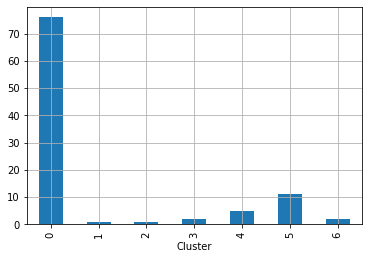

In [74]:
import matplotlib.pyplot as plt

cluster_count = cluster_members.groupby('Cluster')['Postcode'].count()
cluster_count.plot(kind='bar', grid=True)
plt.show()

#### Mapping population density across Toronto

In [29]:
population_canada = pd.read_excel('../dataBank/population_canada.xlsx')
population_canada.tail()

,Geographic code,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016","Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
1637,X0G,X0G,Nunavut/Northwest Territories,NaN,500,210,164
1638,X1A,X1A,Nunavut/Northwest Territories,NaN,20054,8093,7318
1639,Y0A,Y0A,Yukon,NaN,1641,1002,742
1640,Y0B,Y0B,Yukon,NaN,6561,4870,3122
1641,Y1A,Y1A,Yukon,NaN,27672,12115,11351


In [30]:
population_canada = population_canada.drop(columns=['Geographic name','Incompletely enumerated Indian reserves and Indian settlements, 2016', 'Private dwellings occupied by usual residents, 2016'])
population_canada.head()

,Geographic code,Province or territory,"Population, 2016","Total private dwellings, 2016"
0,1,NaN,35151728,15412443
1,A0A,Newfoundland and Labrador,46587,26155
2,A0B,Newfoundland and Labrador,19792,13658
3,A0C,Newfoundland and Labrador,12587,8010
4,A0E,Newfoundland and Labrador,22294,12293


In [31]:
population_ontario = population_canada[population_canada['Province or territory'] == 'Ontario'].reset_index().drop(columns=['index'])
population_ontario[population_ontario['Geographic code'] == 'M9B']

,Geographic code,Province or territory,"Population, 2016","Total private dwellings, 2016"
338,M9B,Ontario,32400,12617


In [32]:
df_toronto.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [33]:
population_canada.columns = ['Postcode', 'Province', 'Population 2016', 'Private Dwellings 2016']

In [34]:
population_toronto = pd.merge(population_canada.copy(), df_toronto.copy(), on='Postcode')
population_toronto.head(10)

,Postcode,Province,Population 2016,Private Dwellings 2016,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Ontario,66108,20957,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Ontario,35626,11588,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Ontario,46943,17637,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Ontario,29690,10116,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Ontario,24383,9274,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Ontario,36699,12797,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Ontario,48434,18620,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Ontario,35081,12884,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Ontario,22913,8908,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Ontario,22136,9535,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [35]:
m = folium.Map(location=[latitude, longitude], zoom_start=13, tiles="CartoDB dark_matter")

# scaling population values to fit the map
x, y = population_toronto['Population 2016'].min(), population_toronto['Population 2016'].max()
population_toronto['scaled_population'] = (population_toronto['Population 2016'] - x)/(y - x)*(500 - 100) + 100

population_toronto.head()

# add markers to map
for lat, lng, population, neighborhood, borough in zip(population_toronto['Latitude'], population_toronto['Longitude'], population_toronto['scaled_population'], population_toronto['Neighbourhood'], population_toronto['Borough']):
    label = '{} ({})'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=population,
        popup=label,
        color='#E37222',
        fill=True,
        fill_color='#FFFFFF',
        fill_opacity=0.3,
        parse_html=False).add_to(m)  

m

In [36]:
# determine popular venues among the top ten high population areas